# 2021 인공지능 기말 프로젝트
학번 & 이름: 2016320179 진석현

#### 목차


1. Introduction - 실험 요약
2. Data Selection & EDA - 데이터 셋 선정 및 분석
3. Experimental Design - 실험 설계 및 방법
4. Experimental Process - 실험 과정
5. Experimental Result - 실험 결과



## 1. Introduction - 실험 요약
이번 실험에서는 Titanic 승선객 데이터셋을 활용한 생존여부 분류기 모델(Titanic Survivor Classifier)을 만들고자 한다. 데이터셋의 경우 Kaggle에서 제공되는 Titanic 승선객 레이블 데이터를 활용하여 Supervised Learning 실험을 진행할 것이다. 데이터셋의 경우 실험 자료로 제공되는 전처리된 데이터를 활용할 예정이기에 추가적인 전처리나 Feature Engineering 없이 실험을 진행할 예정이다.

Label:y의 경우 `Survived`, 즉 생존 여부를 묻는다. 1의 값은 생존, 0의 값은 생존하지 못하였다는 의미를 가진다. 나머지 7개의 Feature를 통하여 `Survived`라는 Categorical data를 예측할 수 있는 분류기(Classifier)를 생성하기 위하여 다음과 같은 일련의 과정을 거쳤다.

우선, EDA를 통해 데이터셋의 모양과 각 Feature가 가지는 의미를 파악하였다. 데이터셋의 경우 전체 데이터의 20%를 Test Set으로 사용하였고, 80%의 경우 Cross-validation 방식을 이용하여 Train Set과 Validation Set으로 사용하였다.

그 후 `Decision Tree`, `Logistic Regression`, `Multilayer Perceptron(MLP)`의 세 모델을 가지고 5-fold Cross-validation을 통해 각 모델들에 대한 최적의 Parameter를 선정하였다. 모델마다 3개의 Parameter를 조작하였고, 평가지표로 `ROC_AUC Score`를 사용하였다. 비교에 있어서는 많은 Parameter를 제한된 자원을 활용하여 최대한 많이 비교할 수 있도록 Loop Iteration을 활용하였다.

각 모델별로 최적의 Parameter를 구한 뒤, 해당 모델들을 Train Set에 학습시켜 최종 모델을 생성하였다. 학습된 최종 모델을 Test Set에 적용하여 나온 결과를 비교 분석하였고, 이 역시 `ROC_AUC Score`를 최종 평가지표로 사용하였다.

그 결과 `Multilayer Perceptron(MLP)`이 가장 높은 성능을 가져오는 것으로 확인되었다. 이 모델의 Parameter는 다음과 같다.

`MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', max_iter=10000, random_state=42)`

해당 모델은 다음과 같은 성능을 가져왔다.

`Accuracy = 0.79, Precision = 0.75, Recall = 0.70, F1-score = 0.72, ROC AUC Score = 0.77`

최종적으로, Titanic 승선객 생존여부 분류기에 사용할 모델로 **MLP**를 선정하였다.



## 2. Data Selection & EDA - 데이터 셋 선정 및 분석
데이터 셋은 Titanic data로 선정하여 진행하였다. 해당 데이터 셋의 출처는 아래와 같다.

i.	원출처: https://www.kaggle.com/c/titanic

ii.	전처리된 데이터: https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv


In [ ]:
# import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import data
url = "https://raw.githubusercontent.com/inikoreaackr/datasets/main/titanic.csv"
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0.0,3,22.0,1,0,7.2500,0,1
1,1.0,1,38.0,1,0,71.2833,1,0
2,1.0,3,26.0,0,0,7.9250,1,0
3,1.0,1,35.0,1,0,53.1000,1,0
4,0.0,3,35.0,0,0,8.0500,0,1


In [ ]:
df.shape

(714, 8)

In [ ]:
df.dtypes

Survived      float64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      int64
Sex_male        int64
dtype: object

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546,0.634454
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.481921
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000


우선, 해당 데이터셋의 기본적인 데이터 형태와 분포를 파악하였다. Column(Feature)은 총 8개이며, Row(Instance)는 총 714개이다.

각각의 feature에 대한 설명은 아래와 같다.
* Survived: 살아남은 여부를 말해주는 데이터이다. 살아남았을 경우 1, 살아남지 못했을 경우 0의 값을 갖는다. 실험에서 label, 즉 y값으로 사용된다.
* PClass: 소유한 티켓의 클래스에 대한 데이터이다. 1등급일 경우 1, 2등급은 2, 3등급은 3의 값을 갖는다. 사회-경제적 지위(SES)를 간접적으로 보여준다.
* Age: 나이에 대한 데이터이다.
* SibSp: 형제/자매/배우자가 몇 명 동승했는지 알려주는 데이터이다.
* Parch: 부모/자식이 몇 명 동승했는지 알려주는 데이터이다.
* Fare: 탑승 요금에 대한 데이터이다. 
* Sex_female: 성별이 여성인지에 대한 데이터이다. 여성일 경우 1, 여성이 아닐 경우 0의 값을 갖는다.
* Sex_male: 성별이 남성인지에 대한 데이터이다. 남성일 경우 1, 남성이 아닐 경우 0의 값을 갖는다.

위의 정보를 가지고, EDA를 아래와 같이 진행하였다.

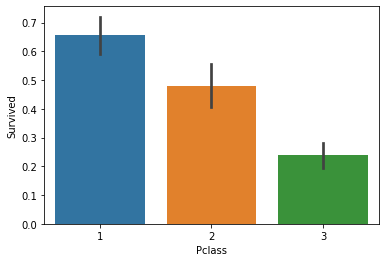

In [ ]:
sns.barplot(x="Pclass", y='Survived', data=df);

위의 그래프를 바탕으로, 소유한 티켓의 클래스에 따라 생존 여부에서 차이가 나는 것을 알 수 있다. 해당 그래프의 Survived 값은 해당 클래스에서의 생존률로 해석할 수 있다. 클래스가 높을수록, 즉 SES가 높을수록 높은 생존률을 보인다.

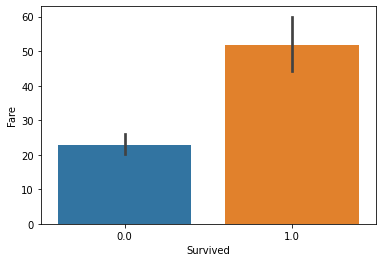

In [ ]:
sns.barplot(x='Survived', y='Fare',data=df);

위의 그래프를 바탕으로, 생존한 인원들의 탑승 요금이 생존하지 못한 인원들보다 현저히 큰것을 알 수 있다. 이 결과는 이전의 SES가 높을수록 높은 생존률을 보인다는 주장을 뒷받침한다.

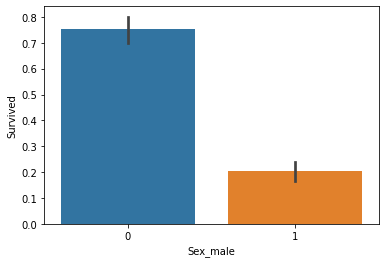

In [ ]:
sns.barplot(x="Sex_male", y='Survived', data=df);

위의 그래프를 바탕으로, 성별에 따라 생존 여부에서 차이가 나는 것을 알 수 있다. Sex_male이 1인 경우 남성, Sex_male이 0인 경우 여성에 해당하는데, 여성의 생존률이 남성에 비해 매우 높은것을 알 수 있다.

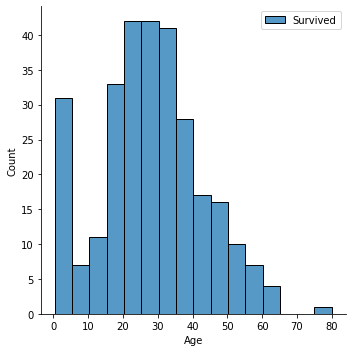

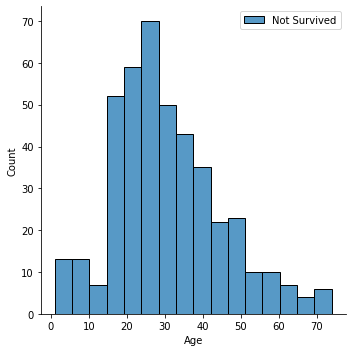

In [ ]:
sns.displot(x="Age", data=df[df['Survived']==1], label='Survived')
plt.legend()
sns.displot(x="Age", data=df[df['Survived']==0], label='Not Survived')
plt.legend();

위의 그래프는 나이에 따른 생존 여부의 분포를 보여준다. 5세 이하의 영유아의 경우 생존 인원이 매우 큰 것을 볼 수 있는데, 영유아의 경우 우선적으로 구조되었을 가능성을 보여준다. 그 외 나이에 따른 생존 여부에 있어서는 그 숫자는 차이가 있지만 비슷한 분포를 보이기에, 생존에 있어서 큰 인과관계는 없는 것으로 보인다.

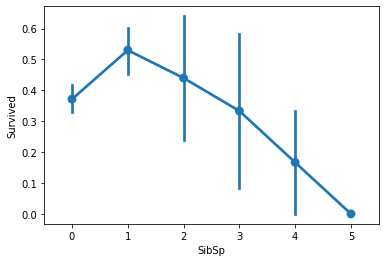

In [ ]:
sns.pointplot(x='SibSp',y='Survived', data=df);

위의 그래프는 가족 중 (형제/자매/배우자)인 승객들이 몇 명이 함께 승선했는지에 따른 생존 양상을 보여준다. 1명과 함께 동승한 경우 생존률이 매우 높은 것을 알 수 있고, 2명부터 생존율이 떨어지는 양상을 보인다. 1명의 경우 서로 도움을 주어 생존률이 올라간 것으로 보이지만, 2명 부터는 오히려 독이 되었다고 볼 수 있다.

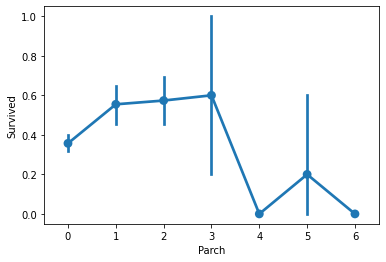

In [ ]:
sns.pointplot(x='Parch',y='Survived', data=df, dodge=True);

위의 그래프는 가족 중 (부모/자식)인 승객들이 몇 명이 함께 승선했는지에 따른 생존 양상을 보여준다. 1명, 2명 3명과 함께 동승한 경우 생존률이 매우 높은 것을 알 수 있고, 3명에서 가장 높은 생존률을 가진다. 하지만 4명부터 급격히 생존률이 떨어지게 된다.

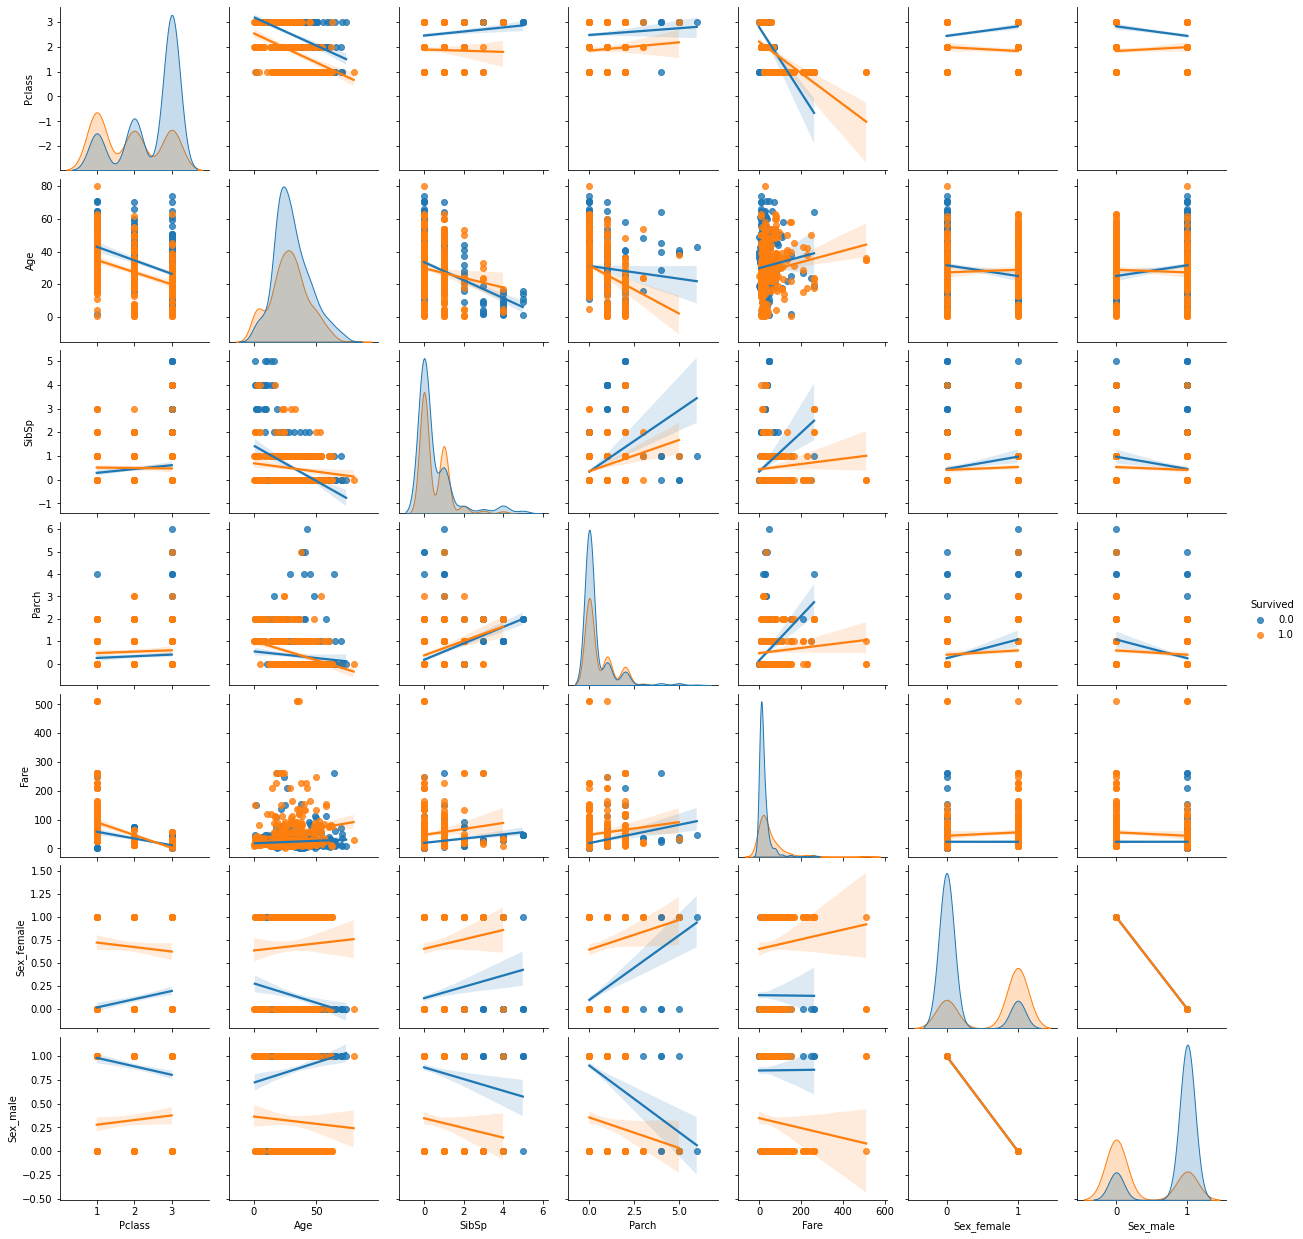

In [ ]:
sns.pairplot(data=df, hue='Survived', kind='reg');

다음은 데이터 전체에 대해 Pairplot을 진행한 결과이다. 두 데이터간의 관계를 간략하게 파악할 수 있다. 노란색 plot의 경우 생존자, 파란색 plot의 경우 생존하지 못한 사람을 의미한다.

지금까지 EDA를 진행하며 각 feature가 생존 여부에 어떤 영향을 주는지 파악하였다. 이에, 각 feature는 모두 생존여부를 판단하는데 유의미한 영향을 주는 것으로 판단하여, drop하는 feature없이 모두 모델 학습에 사용하기로 결정하였다.

## 3. Experimental Design - 실험 설계 및 방법
EDA를 통해 파악한 정보를 바탕으로 추가적인 Feature Engineering을 진행하여 더 높은 예측률을 가져올 것을 예상할 수 있지만, 이번 실험에서는 기존의 feature를 그대로 모두 사용하여 `label:y`를 예측할 것이다.


예측값 y는 `'Survived'` column으로, 1의 값을 가지면 살아남았다는 것, 0의 값을 가지면 살아남지 못했다는 것을 의미한다. 예측에 사용될 feature는 `['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']`로 총 7개의 column을 이용한다.

`Test Set`의 경우 전체 데이터에서 `train_test_split`함수를 사용하여 분리하였다. 이때, `test_size=0.2`를 사용하여 전체 데이터의 20%를 할당하였다. `random_state=42`의 경우 실험을 진행하면서 값이 바뀌는 경우를 방지하여 항상 일관된 환경에서 실험을 진행할 수 있도록 설정하였다. 이 랜덤시드값의 경우 이후 환경설정에도 동일하게 42로 사용하였다.

`Validation Set`의 경우 따로 분리하지 않고, Cross-validation을 통해 앞으로 사용할 모델에 대한 Parameter 설정에 사용하였다. 모든 실험 모델에 대해 동일하게 5-fold Cross-validation 방식을 사용하였다.

이번 실험에서는 총 세 개의 모델을 사용한다. 그 모델은 다음과 같다.
* Decision Tree
* Logistic Regression
* Multilayer Perceptron(MLP)

각각의 모델에 대해서 3개의 Parameter를 조정하였다. 조정된 Parameter는 다음과 같다.
1. Decision Tree
  - min_sample_leaf = `[1, 10, 20, 30, 40, 50, 60, 100]`
  - max_depth = `[None, 10, 7, 5, 3]`
  - min_samples_split = `[2, 5, 10, 15, 20, 40, 70, 100, 150, 200]`
2. Logistic Regression
  - solver = `['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
  - penalty = `['l1', 'l2', 'elasticnet', 'none']`
  - class_weight = `['balanced', {1:0.5, 0:1}, {1:1, 0:0.5}, {1:0.7, 0:0.9}, {1:0.9, 0:0.7}, None]`
3. MLP
  - hidden_layer_sizes = `[(200,), (150,), (100,), (50,)]`
  - activation = `['identity', 'logistic', 'tanh', 'relu']`
  - solver = `['lbfgs', 'sgd', 'adam']`

위에 제시된 Parameter들의 모든 조합에 대해서 모델을 평가하기위해 3중 for문을 이용해 iteration을 하였다. 이와 같은 Iteration을 사용한 이유는, 한정된 자원과 시간 내에서 최대한 많은 경우에 대해 실험을 진행할 수 있는 최적의 방법이라 판단하였기 때문이다. Iteration을 진행하며 각각의 모델이 5-fold Cross-validation를 통해 도출해내는 `Accuracy`, `Precision`, `Recall`, `F1`, `ROC_AUC`를 출력하였다. 

이 수많은 모델 중 가장 높은 성능을 가져올 수 있는 Parameter를 선정하기 위하여 `Max_ROC_AUC_Val`, `Param` 변수를 선언, 가장 높은 ROC_AUC 값을 가지는 모델의 ROC_AUC 값과 그 Parameter를 해당 변수에 저장하도록 코드를 구성하였다.

`Max_ROC_AUC_Val`, `Param`변수에 저장된 값을 통해 가장 높은 성능을 가져오는 Parameter를 선정하고, 해당 Parameter를 사용해 Train Set에 대해 학습, 최종 모델을 만들었다. 이 과정을 통해 학습된 모델은 다음과 같다.
1. Decision Tree: `decTree_Final`
2. Logistic Regression: `lr_Final`
3. MLP: `mlp_Final`

최종 모델을 사용하여 Test set에 대한 성능을 비교하며 가장 좋은 모델을 선정하며 이번 실험을 종료한다. Test set 성능 비교 또한 Parameter를 선정하며 사용한 방법처럼 ROC_AUC값을 비교한다.

## 4. Experimental Process - 실험 과정
다음과 같은 방법을 사용하여 train set과 test set을 분리한 뒤 `y: label`, `X: features`를 설정하였다.

In [ ]:
# split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

y_train = np.array(train_df.pop('Survived'))
y_test = np.array(test_df.pop('Survived'))

X_train = np.array(train_df)
X_test = np.array(test_df)

### 4-a. Decision Tree

우선, Parameter를 설정하지 않은 Decision Tree 모델에 대해 5-fold cross-validation을 진행하였다. 실험의 일관성을 위해 `random_state=42`로 설정하였다. Cross-validation을 통해 도출해낸 Accuracy, Precision, Recall, F1, ROC_AUC값은 아래와 같다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier(random_state=42)

# 5-fold cross validation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv1_results = cross_validate(decTree, X_train, y_train, scoring=scoring, cv=5)

In [ ]:
print('Accuracy: {}'.format(np.mean(cv1_results['test_accuracy'])))
print('Precision: {}'.format(np.mean(cv1_results['test_precision'])))
print('Recall: {}'.format(np.mean(cv1_results['test_recall'])))
print('F1: {}'.format(np.mean(cv1_results['test_f1'])))
print('ROC_AUC: {}'.format(np.mean(cv1_results['test_roc_auc'])))

Accuracy: 0.7758047292143402
Precision: 0.7316262012481853
Recall: 0.7222016651248844
F1: 0.7254600399600399
ROC_AUC: 0.7677612102733868


주어진 Data에 대해 Decision Tree 모델의 성능을 최대한 높이기 위하여 3가지 Parameter: 
- min_sample_leaf = [1, 10, 20, 30, 40, 50, 60, 100]
- max_depth = [None, 10, 7, 5, 3]
- min_samples_split = [2, 5, 10, 15, 20, 40, 70, 100, 150, 200]

를 조정하였다.

해당 파라미터는 다음과 같은 특징을 가진다.

> **min_samples_leaf**: 리프 노드가 되기 위해 필요한 샘플 데이터 수의 하한선을 설정하며 Pruning을 한다. 값이 클 경우 더 간단한(Pruning이 많이 된) 트리가 만들어진다.

> **max_depth**: 트리의 깊이의 상한선을 설정하면서 Pruning을 한다. 해당 갚이 작을수록 트리의 깊이가 작아져서 더 간단한(Pruning이 많이 된) 트리가 만들어진다.

> **min_samples_split**: 노드를 분할하기 위해 필요한 샘플 데이터 수의 하한선을 설정하면서 Pruning을 한다. 값을 작게 설정할수록 노드가 많이 분할되므로 Overfitting이 발생할 수 있으며, 값이 클 경우 더 간단한(Pruning이 많이 된) 트리가 만들어진다.

3중 for문을 사용하여 위에 제시한 Parameter들의 모든 조합에 대해 모델을 5-fold Cross-validation을 통해 학습하여 각각에 대한 Accuracy, Precision, Recall, F1, ROC_AUC값을 도출하였다. 모델 비교를 위한 지표로 ROC_AUC값을 선정하였는데, 이들 중 가장 높은 ROC_AUC 값을 가지는 모델의 Parameter를 `Param` 딕셔너리에 저장하였다.

In [ ]:
Max_ROC_AUC_Val = 0
Param = {}

min_sample_leaf = [1, 10, 20, 30, 40, 50, 60, 100]
max_depth = [None, 10, 7, 5, 3]
min_samples_split = [2, 5, 10, 15, 20, 40, 70, 100, 150, 200]

for msl in min_sample_leaf:
  for md in max_depth:
    for mss in min_samples_split:
      decTree = DecisionTreeClassifier(min_samples_leaf=msl, max_depth=md, min_samples_split=mss, random_state=42)
      cv1_results = cross_validate(decTree, X_train, y_train, scoring=scoring, cv=5)

      print('max_depth= ', md)
      print('min_sample_leaf= ', msl)
      print('min_samples_split= ', mss)
      print('Accuracy: {}'.format(np.mean(cv1_results['test_accuracy'])))
      print('Precision: {}'.format(np.mean(cv1_results['test_precision'])))
      print('Recall: {}'.format(np.mean(cv1_results['test_recall'])))
      print('F1: {}'.format(np.mean(cv1_results['test_f1'])))
      ROC_AUC = np.mean(cv1_results['test_roc_auc'])
      print('ROC_AUC: {}'.format(ROC_AUC))
      print("\n")

      if ROC_AUC > Max_ROC_AUC_Val:
        Max_ROC_AUC_Val = ROC_AUC
        Param['min_sample_leaf'] = msl
        Param['max_depth'] = md
        Param['min_samples_split'] = mss

max_depth=  None
min_sample_leaf=  1
min_samples_split=  2
Accuracy: 0.7758047292143402
Precision: 0.7316262012481853
Recall: 0.7222016651248844
F1: 0.7254600399600399
ROC_AUC: 0.7677612102733868


max_depth=  None
min_sample_leaf=  1
min_samples_split=  5
Accuracy: 0.7828070175438597
Precision: 0.7523498139287613
Recall: 0.709435707678076
F1: 0.7286967228362917
ROC_AUC: 0.7976028601618343


max_depth=  None
min_sample_leaf=  1
min_samples_split=  10
Accuracy: 0.7863157894736843
Precision: 0.7600363364858138
Recall: 0.7094357076780758
F1: 0.7321518285559822
ROC_AUC: 0.8211145258633643


max_depth=  None
min_sample_leaf=  1
min_samples_split=  15
Accuracy: 0.7933485888634629
Precision: 0.7619450540423185
Recall: 0.7266419981498613
F1: 0.7415543550485106
ROC_AUC: 0.8442120524601242


max_depth=  None
min_sample_leaf=  1
min_samples_split=  20
Accuracy: 0.7880854309687262
Precision: 0.7518316753575113
Recall: 0.726549491211841
F1: 0.7369197889534496
ROC_AUC: 0.8457420006676093


max_depth

위의 Iteration을 통해, 가장 높은 ROC_AUC값을 가지는 Parameter를 구하였다. 그 값은 다음과 같다.
- `'min_sample_leaf'`: 10
- `'max_depth'`: None
- `'min_samples_split'`: 100

해당 Parameter를 이용하여 `decTree_Final`라는 이름의 모델을 Train set에 대하여 학습시켰다. 그 후 아래와 같이 Train set에 대한 Score를 출력해 보았다.


In [ ]:
print('Max ROC AUC= {}'.format(Max_ROC_AUC_Val))
print(Param)

Max ROC AUC= 0.8737441005507371
{'min_sample_leaf': 10, 'max_depth': None, 'min_samples_split': 100}


In [ ]:
decTree_Final = DecisionTreeClassifier(min_samples_leaf=10, max_depth=None, min_samples_split=100, random_state=42)
decTree_Final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
decTree_Final.score(X_train, y_train)

0.8056042031523643

Decision Tree 최종모델을 이용하여 Test Set에 대한 결과를 확인하기 위해 X_test 데이터를 이용하여 값을 예측한 뒤 그 결과에 따른 `Classification Report`와 `ROC AUC Score`를 출력하였다. 그 결과는 아래와 같다.

In [ ]:
y_decTree_pred_test = decTree_Final.predict(X_test)
print(classification_report(y_test, y_decTree_pred_test))

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        87
         1.0       0.66      0.68      0.67        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.73      0.74       143



In [ ]:
roc_auc_score(y_test, y_decTree_pred_test)

0.7243431855500821

### 4-b. Logistic Regression

우선, Parameter를 설정하지 않은 Logistic Regression 모델에 대해 5-fold cross-validation을 진행하였다. 실험의 일관성을 위해 `random_state=42`로 설정하였고, `max_iter`값은 10000으로 제한하였다. Cross-validation을 통해 도출해낸 Accuracy, Precision, Recall, F1, ROC_AUC값은 아래와 같다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000, random_state=42)

# 5-fold cross validation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv2_results = cross_validate(lr, X_train, y_train, scoring=scoring, cv=5)

In [ ]:
print('Accuracy: {}'.format(np.mean(cv2_results['test_accuracy'])))
print('Precision: {}'.format(np.mean(cv2_results['test_precision'])))
print('Recall: {}'.format(np.mean(cv2_results['test_recall'])))
print('F1: {}'.format(np.mean(cv2_results['test_f1'])))
print('ROC_AUC: {}'.format(np.mean(cv2_results['test_roc_auc'])))

Accuracy: 0.8144012204424105
Precision: 0.7959559045605558
Recall: 0.7350601295097132
F1: 0.7641914476990198
ROC_AUC: 0.8667991259353232


주어진 Data에 대해 Logistic Regression 모델의 성능을 최대한 높이기 위하여 3가지 Parameter: 
- solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
- penalty = ['l1', 'l2', 'elasticnet', 'none']
- class_weight = ['balanced', {1:0.5, 0:1}, {1:1, 0:0.5}, {1:0.7, 0:0.9}, {1:0.9, 0:0.7}, None]

를 조정하였다. 

해당 파라미터는 다음과 같은 특징을 가진다.

> **solver**: Optimization problem에 사용될 알고리즘을 선정한다. 기본값으로 lbfgs를 사용한다.

> **penalty**: Regularization에 사용하며 패널티를 줄 Norm을 선정한다. `None`을 선정할 경우 regularization이 사용되지 않는다. 기본값으로 l2-norm을 사용한다.

> **class_weight**: 각각의 Class에 어느 정도의 가중치를 줄지 결정한다. 기본값으로 1을 가진다.

3중 for문을 사용하여 위에 제시한 Parameter들의 모든 조합에 대해 모델을 5-fold Cross-validation을 통해 학습하여 각각에 대한 Accuracy, Precision, Recall, F1, ROC_AUC값을 도출하였다. 모델 비교를 위한 지표로 ROC_AUC값을 선정하였는데, 이들 중 가장 높은 ROC_AUC 값을 가지는 모델의 Parameter를 `Param` 딕셔너리에 저장하였다.

Solver가 Newton-cg, lbfgs, sag인 경우 Penalty로 l1, elasticnet을 지원하지 않고, Solver가 liblinear일 경우 Penalty로 none, elasticnet을 지원하지 않았다. 또한 Solver가 Saga이며 Penalty가 elasticnet일 경우 Fit-fail이 일어났다. 따라서 이 경우는 if-continue 문으로 계산과정을 생략하며 진행하였다.

In [ ]:
Max_ROC_AUC_Val = 0
Param = {}

solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
class_weight = ['balanced', {1:0.5, 0:1}, {1:1, 0:0.5}, {1:0.7, 0:0.9}, {1:0.9, 0:0.7}, None]
for slv in solver:
  for pnt in penalty:
    if (slv in ['newton-cg', 'lbfgs', 'sag']) and (pnt in ['l1', 'elasticnet']) or (slv == 'liblinear') and (pnt in ['none', 'elasticnet']) or (slv == 'saga') and (pnt == 'elasticnet'):
      continue
    for cw in class_weight:
      lr = LogisticRegression(solver=slv, penalty=pnt, class_weight=cw, max_iter=10000, random_state=42)
      cv2_results = cross_validate(lr, X_train, y_train, scoring=scoring, cv=5)
      print('solver=', slv)
      print('penalty= ', pnt)
      print('class_weight= ', cw)

      print('Accuracy: {}'.format(np.mean(cv2_results['test_accuracy'])))
      print('Precision: {}'.format(np.mean(cv2_results['test_precision'])))
      print('Recall: {}'.format(np.mean(cv2_results['test_recall'])))
      print('F1: {}'.format(np.mean(cv2_results['test_f1'])))
      ROC_AUC = np.mean(cv2_results['test_roc_auc'])
      print('ROC_AUC: {}'.format(ROC_AUC))
      print("\n")

      if ROC_AUC > Max_ROC_AUC_Val:
        Max_ROC_AUC_Val = ROC_AUC
        Param['solver'] = slv
        Param['penalty'] = pnt
        Param['class_weight'] = cw

solver= newton-cg
penalty=  l2
class_weight=  balanced
Accuracy: 0.8073836765827613
Precision: 0.7537745532995807
Recall: 0.7862164662349675
F1: 0.7695208518189884
ROC_AUC: 0.8665428638491172


solver= newton-cg
penalty=  l2
class_weight=  {1: 0.5, 0: 1}
Accuracy: 0.8021357742181541
Precision: 0.8689621547543748
Recall: 0.6111008325624422
F1: 0.7171088624395523
ROC_AUC: 0.8670521596187317


solver= newton-cg
penalty=  l2
class_weight=  {1: 1, 0: 0.5}
Accuracy: 0.784607170099161
Precision: 0.7115928403327125
Recall: 0.8033302497687327
F1: 0.7539645138452403
ROC_AUC: 0.866351311949801


solver= newton-cg
penalty=  l2
class_weight=  {1: 0.7, 0: 0.9}
Accuracy: 0.8126620900076278
Precision: 0.8144986449864497
Recall: 0.704995374653099
F1: 0.7553053140337328
ROC_AUC: 0.8673664923464519


solver= newton-cg
penalty=  l2
class_weight=  {1: 0.9, 0: 0.7}
Accuracy: 0.8109077040427156
Precision: 0.7689844793915099
Recall: 0.769195189639223
F1: 0.7690188831987047
ROC_AUC: 0.8666082440818708


solver

위의 Iteration을 통해, 가장 높은 ROC_AUC값을 가지는 Parameter를 구하였다. 그 값은 다음과 같다.
- `'solver'`: newton-cg
- `'penalty'`: l2
- `'class_weight'`: {1: 0.7, 0: 0.9}}

해당 Parameter를 이용하여 `lr_Final`라는 이름의 모델을 Train set에 대하여 학습시켰다. 그 후 아래와 같이 Train set에 대한 Score를 출력해 보았다.

In [ ]:
print('Max ROC AUC= {}'.format(Max_ROC_AUC_Val))
print(Param)

Max ROC AUC= 0.8673664923464519
{'solver': 'newton-cg', 'penalty': 'l2', 'class_weight': {1: 0.7, 0: 0.9}}


In [ ]:
lr_Final = LogisticRegression(solver='newton-cg', penalty='l2', class_weight={1: 0.7, 0: 0.9}, max_iter=10000, random_state=42)
lr_Final.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.9, 1: 0.7}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [ ]:
lr_Final.score(X_train, y_train)

0.819614711033275

Logistic Regression 최종모델을 이용하여 Test Set에 대한 결과를 확인하기 위해 X_test 데이터를 이용하여 값을 예측한 뒤 그 결과에 따른 `Classification Report`와 `ROC AUC Score`를 출력하였다. 그 결과는 아래와 같다.

In [ ]:
y_lr_pred_test = lr_Final.predict(X_test)
print(classification_report(y_test, y_lr_pred_test))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        87
         1.0       0.71      0.62      0.67        56

    accuracy                           0.76       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.76      0.75       143



In [ ]:
roc_auc_score(y_test, y_lr_pred_test)

0.7320402298850575

### 4-c. Multilayer Perceptron(MLP)

우선, Parameter를 설정하지 않은 MLP 모델에 대해 5-fold cross-validation을 진행하였다. 실험의 일관성을 위해 `random_state=42`로 설정하였고, `max_iter`값은 1000으로 제한하였다. Cross-validation을 통해 도출해낸 Accuracy, Precision, Recall, F1, ROC_AUC값은 아래와 같다.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=42)

# 5-fold cross validation
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv3_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)

In [ ]:
print('Accuracy: {}'.format(np.mean(cv3_results['test_accuracy'])))
print('Precision: {}'.format(np.mean(cv3_results['test_precision'])))
print('Recall: {}'.format(np.mean(cv3_results['test_recall'])))
print('F1: {}'.format(np.mean(cv3_results['test_f1'])))
print('ROC_AUC: {}'.format(np.mean(cv3_results['test_roc_auc'])))

Accuracy: 0.8038291380625477
Precision: 0.7782265198569547
Recall: 0.730804810360777
F1: 0.7529027580100683
ROC_AUC: 0.8711582006710206


주어진 Data에 대해 MLP 모델의 성능을 최대한 높이기 위하여 3가지 Parameter:

- hidden_layer_sizes = [(200,), (150,), (100,), (50,)]
- activation = ['identity', 'logistic', 'tanh', 'relu']
- solver = ['lbfgs', 'sgd', 'adam']

를 조정하였다.

해당 파라미터는 다음과 같은 특징을 가진다.

> **hidden_layer_sizes**: Hidden layer의 개수와 각 Hidden layer가 가진 Neuron의 개수를 설정한다. 기본값으로 (100,)을 사용한다.

> **activation**: Hidden layer에 사용할 Activation function을 설정한다. 기본값으로 relu를 사용한다.

> **solver**: Weight을 Optimize할때 사용할 Solver를 선정한다. 기본값으로 adam을 사용한다.

3중 for문을 사용하여 위에 제시한 Parameter들의 모든 조합에 대해 모델을 5-fold Cross-validation을 통해 학습하여 각각에 대한 Accuracy, Precision, Recall, F1, ROC_AUC값을 도출하였다. 모델 비교를 위한 지표로 ROC_AUC값을 선정하였는데, 이들 중 가장 높은 ROC_AUC 값을 가지는 모델의 Parameter를 `Param` 딕셔너리에 저장하였다.

In [ ]:
Max_ROC_AUC_Val = 0
Param = {}

hidden_layer_sizes = [(200,), (150,), (100,), (50,)]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']

for hls in hidden_layer_sizes:
  for act in activation:
    for slv in solver:
      mlp = MLPClassifier(hidden_layer_sizes=hls, activation=act, solver=slv, max_iter=1000, random_state=42)
      cv3_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)
      print('hidden_layer_sizes=', hls)
      print('activation=', act)
      print('solver=', slv)

      print('Accuracy: {}'.format(np.mean(cv3_results['test_accuracy'])))
      print('Precision: {}'.format(np.mean(cv3_results['test_precision'])))
      print('Recall: {}'.format(np.mean(cv3_results['test_recall'])))
      print('F1: {}'.format(np.mean(cv3_results['test_f1'])))
      ROC_AUC = np.mean(cv3_results['test_roc_auc'])
      print('ROC_AUC: {}'.format(ROC_AUC))
      print("\n")

      if ROC_AUC > Max_ROC_AUC_Val:
        Max_ROC_AUC_Val = ROC_AUC
        Param['hidden_layer_sizes'] = hls
        Param['activation'] = act
        Param['solver'] = slv

hidden_layer_sizes= (200,)
activation= identity
solver= lbfgs
Accuracy: 0.590190694126621
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC_AUC: 0.42245930791165787




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

hidden_layer_sizes= (200,)
activation= identity
solver= sgd
Accuracy: 0.6338825324180016
Precision: 0.6341100986237995
Recall: 0.5517113783533765
F1: 0.5249712268723783
ROC_AUC: 0.7552856669474091


hidden_layer_sizes= (200,)
activation= identity
solver= adam
Accuracy: 0.7811136536994662
Precision: 0.7642330793506605
Recall: 0.6751156336725254
F1: 0.715777740320046
ROC_AUC: 0.8548786445418877




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (200,)
activation= logistic
solver= lbfgs
Accuracy: 0.7391914569031274
Precision: 0.6841147741147742
Recall: 0.6839962997224791
F1: 0.6831593184050745
ROC_AUC: 0.7666901115037534


hidden_layer_sizes= (200,)
activation= logistic
solver= sgd
Accuracy: 0.6987032799389779
Precision: 0.6691948574301515
Recall: 0.525809435707678
F1: 0.5882242020328114
ROC_AUC: 0.7318250262536152


hidden_layer_sizes= (200,)
activation= logistic
solver= adam
Accuracy: 0.8021052631578947
Precision: 0.7875968992248061
Recall: 0.7094357076780758
F1: 0.7460457411743566
ROC_AUC: 0.8689951504923009




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (200,)
activation= tanh
solver= lbfgs
Accuracy: 0.7600305110602593
Precision: 0.7185024315852904
Recall: 0.6919518963922295
F1: 0.7023980278629234
ROC_AUC: 0.7780179474830234


hidden_layer_sizes= (200,)
activation= tanh
solver= sgd
Accuracy: 0.7775743707093821
Precision: 0.7749603811523316
Recall: 0.6492136910268269
F1: 0.7027070828331332
ROC_AUC: 0.844737642526877


hidden_layer_sizes= (200,)
activation= tanh
solver= adam
Accuracy: 0.8038596491228069
Precision: 0.7809305286596668
Recall: 0.7308973172987974
F1: 0.7536170942765527
ROC_AUC: 0.8662296275600829


hidden_layer_sizes= (200,)
activation= relu
solver= lbfgs
Accuracy: 0.5691990846681922
Precision: 0.29000000000000004
Recall: 0.04717853839037928
F1: 0.0798557892056344
ROC_AUC: 0.3646319742637414


hidden_layer_sizes= (200,)
activation= relu
solver= sgd
Accuracy: 0.7495652173913043
Precision: 0.7766346269374024
Recall: 0.5642923219241444
F1: 0.6379216989551141
ROC_AUC: 0.7938821766988099


hidden_layer_sizes=

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hidden_layer_sizes= (150,)
activation= identity
solver= sgd
Accuracy: 0.6238443935926774
Precision: 0.4860372060372061
Recall: 0.5256244218316375
F1: 0.4793290160378768
ROC_AUC: 0.6751588617829393


hidden_layer_sizes= (150,)
activation= identity
solver= adam
Accuracy: 0.7845919145690313
Precision: 0.7632925470147794
Recall: 0.6878815911193339
F1: 0.7226539648706892
ROC_AUC: 0.8599164148241758




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (150,)
activation= logistic
solver= lbfgs
Accuracy: 0.7951487414187642
Precision: 0.7536853426089972
Recall: 0.7389454209065681
F1: 0.7454048700522523
ROC_AUC: 0.8020197212771644


hidden_layer_sizes= (150,)
activation= logistic
solver= sgd
Accuracy: 0.6987032799389779
Precision: 0.6719953602306543
Recall: 0.5214616096207216
F1: 0.5864393561041988
ROC_AUC: 0.732285347761925


hidden_layer_sizes= (150,)
activation= logistic
solver= adam
Accuracy: 0.8056140350877193
Precision: 0.7836435827360388
Recall: 0.7308973172987974
F1: 0.7554366075477844
ROC_AUC: 0.8732037897794047




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (150,)
activation= tanh
solver= lbfgs
Accuracy: 0.7758352402745995
Precision: 0.7404841774766587
Recall: 0.696022201665125
F1: 0.7156994799942221
ROC_AUC: 0.7986671975595712


hidden_layer_sizes= (150,)
activation= tanh
solver= sgd
Accuracy: 0.7862852784134249
Precision: 0.7558002896728883
Recall: 0.7048103607770583
F1: 0.7281865410172769
ROC_AUC: 0.8432686786451917


hidden_layer_sizes= (150,)
activation= tanh
solver= adam
Accuracy: 0.8021052631578949
Precision: 0.7801269841269842
Recall: 0.722109158186864
F1: 0.7485459452546452
ROC_AUC: 0.8667444867408076


hidden_layer_sizes= (150,)
activation= relu
solver= lbfgs
Accuracy: 0.590190694126621
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC_AUC: 0.47157375093298814




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

hidden_layer_sizes= (150,)
activation= relu
solver= sgd
Accuracy: 0.7564912280701754
Precision: 0.730924534924535
Recall: 0.6496762257169287
F1: 0.6798847979054166
ROC_AUC: 0.8136358597175738


hidden_layer_sizes= (150,)
activation= relu
solver= adam
Accuracy: 0.7951029748283753
Precision: 0.7710471549013098
Recall: 0.713691026827012
F1: 0.740492273221523
ROC_AUC: 0.8677422865538444


hidden_layer_sizes= (100,)
activation= identity
solver= lbfgs
Accuracy: 0.590190694126621
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC_AUC: 0.4041785887453411




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

hidden_layer_sizes= (100,)
activation= identity
solver= sgd
Accuracy: 0.7389473684210526
Precision: 0.7243480741443569
Recall: 0.6188714153561518
F1: 0.6491187532513404
ROC_AUC: 0.7984831379912756


hidden_layer_sizes= (100,)
activation= identity
solver= adam
Accuracy: 0.7881159420289855
Precision: 0.766806532358552
Recall: 0.6963922294172062
F1: 0.727798339416448
ROC_AUC: 0.8559651340619642




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (100,)
activation= logistic
solver= lbfgs
Accuracy: 0.7706178489702517
Precision: 0.7301715088654964
Recall: 0.7005550416281221
F1: 0.7143777713514556
ROC_AUC: 0.8091103496502361


hidden_layer_sizes= (100,)
activation= logistic
solver= sgd
Accuracy: 0.7057208237986269
Precision: 0.6776390276390276
Recall: 0.5385753931544865
F1: 0.5992711287577992
ROC_AUC: 0.7365723621106526


hidden_layer_sizes= (100,)
activation= logistic
solver= adam
Accuracy: 0.7951029748283752
Precision: 0.7722215014703339
Recall: 0.7137835337650322
F1: 0.7406269237660842
ROC_AUC: 0.870931055123252




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (100,)
activation= tanh
solver= lbfgs
Accuracy: 0.7775743707093821
Precision: 0.7499398777514279
Recall: 0.6921369102682702
F1: 0.7185398354728533
ROC_AUC: 0.8097630758435066


hidden_layer_sizes= (100,)
activation= tanh
solver= sgd
Accuracy: 0.7722959572845157
Precision: 0.7359525487432463
Recall: 0.696299722479186
F1: 0.7123359351176173
ROC_AUC: 0.8302336673275079


hidden_layer_sizes= (100,)
activation= tanh
solver= adam
Accuracy: 0.7951029748283753
Precision: 0.7652152399802079
Recall: 0.7220166512488436
F1: 0.7427823240589199
ROC_AUC: 0.8668669833073303


hidden_layer_sizes= (100,)
activation= relu
solver= lbfgs
Accuracy: 0.590190694126621
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC_AUC: 0.4022892624541222




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

hidden_layer_sizes= (100,)
activation= relu
solver= sgd
Accuracy: 0.7268192219679633
Precision: 0.7734782608695652
Recall: 0.5135060129509713
F1: 0.5943071420635214
ROC_AUC: 0.8099097143655397


hidden_layer_sizes= (100,)
activation= relu
solver= adam
Accuracy: 0.8038291380625477
Precision: 0.7782265198569547
Recall: 0.730804810360777
F1: 0.7529027580100683
ROC_AUC: 0.8711582006710206


hidden_layer_sizes= (50,)
activation= identity
solver= lbfgs
Accuracy: 0.590190694126621
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC_AUC: 0.4048935479862482




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

hidden_layer_sizes= (50,)
activation= identity
solver= sgd
Accuracy: 0.6165064836003051
Precision: 0.4981728951478123
Recall: 0.502127659574468
F1: 0.44682721396508124
ROC_AUC: 0.7107755557522829


hidden_layer_sizes= (50,)
activation= identity
solver= adam
Accuracy: 0.784607170099161
Precision: 0.7558729874776386
Recall: 0.7007400555041627
F1: 0.7259157259059275
ROC_AUC: 0.8578679627925562




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (50,)
activation= logistic
solver= lbfgs
Accuracy: 0.7845461479786422
Precision: 0.7537775102478125
Recall: 0.7092506938020351
F1: 0.7302118769522287
ROC_AUC: 0.8204737183646982


hidden_layer_sizes= (50,)
activation= logistic
solver= sgd
Accuracy: 0.7057208237986269
Precision: 0.6760805860805861
Recall: 0.5428307123034227
F1: 0.6015882019285309
ROC_AUC: 0.7372083980705927


hidden_layer_sizes= (50,)
activation= logistic
solver= adam
Accuracy: 0.8003508771929825
Precision: 0.7854295095148752
Recall: 0.7096207215541165
F1: 0.7445047380442029
ROC_AUC: 0.8690793326180764




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

hidden_layer_sizes= (50,)
activation= tanh
solver= lbfgs
Accuracy: 0.7880701754385966
Precision: 0.7795543824099254
Recall: 0.6791859389454209
F1: 0.7242978295521605
ROC_AUC: 0.8198647888056048


hidden_layer_sizes= (50,)
activation= tanh
solver= sgd
Accuracy: 0.7459954233409611
Precision: 0.726029810298103
Recall: 0.6153561517113784
F1: 0.6656017327737919
ROC_AUC: 0.8252855816688447


hidden_layer_sizes= (50,)
activation= tanh
solver= adam
Accuracy: 0.7986117467581998
Precision: 0.7786177461044905
Recall: 0.7135985198889916
F1: 0.7438915173348782
ROC_AUC: 0.8683197848706081




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to c

hidden_layer_sizes= (50,)
activation= relu
solver= lbfgs
Accuracy: 0.6428222730739893
Precision: 0.16818181818181818
Recall: 0.1574468085106383
F1: 0.16263736263736267
ROC_AUC: 0.5096722135635151


hidden_layer_sizes= (50,)
activation= relu
solver= sgd
Accuracy: 0.7302517162471396
Precision: 0.7351423951423952
Recall: 0.5474560592044403
F1: 0.6234439129853732
ROC_AUC: 0.7830792099793789


hidden_layer_sizes= (50,)
activation= relu
solver= adam
Accuracy: 0.7881006864988558
Precision: 0.758404994623397
Recall: 0.7093432007400555
F1: 0.7327949775648216
ROC_AUC: 0.8615671641791046





Parameter 설정에 따라 Precision 값이 정의되지 않거나, lbfgs를 Solver로 사용한 경우 Max_iter에 다다르더라도 Converge가 일어나지 않은 경우도 존재하였다. Converge가 일어나지 않는 경우 Max_iter를 증가시키면서 방지할 수 있을거라 생각하여 `max_iter=100000`으로 설정하여 Converge가 일어나지 않은 하나의 케이스에 대해 따로 실험을 진행해 보았다. 그 결과는 아래처럼 여전히 Converge가 일어나지 않았다. 따라서 이 경우 주어진 환경에서 최적의 성능을 가져오지 못하는 모델로 판단, 무시하여 진행하였다. 실제로 최종 모델 선정에는 영향이 없는 것으로 파악되었다.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='lbfgs', max_iter=100000, random_state=42)
cv3_results = cross_validate(mlp, X_train, y_train, scoring=scoring, cv=5)
print('hidden_layer_sizes=', hls)
print('activation=', act)
print('solver=', slv)

print('Accuracy: {}'.format(np.mean(cv3_results['test_accuracy'])))
print('Precision: {}'.format(np.mean(cv3_results['test_precision'])))
print('Recall: {}'.format(np.mean(cv3_results['test_recall'])))
print('F1: {}'.format(np.mean(cv3_results['test_f1'])))
ROC_AUC = np.mean(cv3_results['test_roc_auc'])
print('ROC_AUC: {}'.format(ROC_AUC))
print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

hidden_layer_sizes= (50,)
activation= relu
solver= adam
Accuracy: 0.7495652173913043
Precision: 0.685039050585269
Recall: 0.7222016651248844
F1: 0.7024201988487702
ROC_AUC: 0.7987510548146247




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


위의 Iteration을 통해, 가장 높은 ROC_AUC값을 가지는 Parameter를 구하였다. 그 값은 다음과 같다.

- `'hidden_layer_sizes'`: (150,)
- `'activation'`: logistic
- `'solver'`: adam

해당 Parameter를 이용하여 mlp_Final라는 이름의 모델을 Train set에 대하여 학습시켰다. 그 후 아래와 같이 Train set에 대한 Score를 출력해 보았다.

In [ ]:
print('Max ROC AUC= {}'.format(Max_ROC_AUC_Val))
print(Param)

Max ROC AUC= 0.8732037897794047
{'hidden_layer_sizes': (150,), 'activation': 'logistic', 'solver': 'adam'}


In [ ]:
mlp_Final = MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', max_iter=10000, random_state=42)
mlp_Final.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_Final.score(X_train, y_train)

0.8476357267950964

MLP 최종모델을 이용하여 Test Set에 대한 결과를 확인하기 위해 X_test 데이터를 이용하여 값을 예측한 뒤 그 결과에 따른 `Classification Report`와 `ROC AUC Score`를 출력하였다. 그 결과는 아래와 같다.

In [ ]:
y_mlp_pred_test = mlp_Final.predict(X_test)
print(classification_report(y_test, y_mlp_pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        87
         1.0       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [ ]:
roc_auc_score(y_test, y_mlp_pred_test)

0.7735016420361247

## 5. Experimental Result - 실험 결과
Decision Tree, Logistic Regression, MLP 모델에 대해 각각 최적의 Parameter를 구하여 모델을 학습하였다. 최종 모델을 이용하여 Test Set에 대해 평가한 결과를 다시 출력하면 아래와 같다.

### Classification Report

In [ ]:
print("-Decision Tree-")
print(classification_report(y_test, y_decTree_pred_test))
print("-Logistic Regression-")
print(classification_report(y_test, y_lr_pred_test))
print("-MLP-")
print(classification_report(y_test, y_mlp_pred_test))

-Decision Tree-
              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        87
         1.0       0.66      0.68      0.67        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.73      0.74       143

-Logistic Regression-
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        87
         1.0       0.71      0.62      0.67        56

    accuracy                           0.76       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.76      0.75       143

-MLP-
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83        87
         1.0       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0

Classification Report는 위와 같다. 더 정밀한 분석을 위하여 Accuracy, Precision, Recall, F1-score를 각각 비교해보겠다. 더 직관적인 비교를 위하여 각각의 Metric을 재출력하였다.

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy')
print('Decision Tree = {}'.format(accuracy_score(y_test, y_decTree_pred_test)))
print('Logistic Regression = {}'.format(accuracy_score(y_test, y_lr_pred_test)))
print('MLP = {}'.format(accuracy_score(y_test, y_mlp_pred_test)))

Accuracy
Decision Tree = 0.7342657342657343
Logistic Regression = 0.7552447552447552
MLP = 0.7902097902097902


Accuracy의 측면에서 비교하자면 MLP가 가장 우수한 성능을 보였고, 그 다음으로는 Logistic Regression, 그리고 Decision Tree 순이다. 

In [ ]:
from sklearn.metrics import precision_score
print('Precision')
print('Decision Tree = {}'.format(precision_score(y_test, y_decTree_pred_test)))
print('Logistic Regression = {}'.format(precision_score(y_test, y_lr_pred_test)))
print('MLP = {}'.format(precision_score(y_test, y_mlp_pred_test)))

Precision
Decision Tree = 0.6551724137931034
Logistic Regression = 0.7142857142857143
MLP = 0.75


Precision의 측면에서 비교하자면 MLP가 가장 우수한 성능을 보였고, 그 다음으로는 Logistic Regression, 그리고 Decision Tree 순이다.

In [ ]:
from sklearn.metrics import recall_score
print('Recall')
print('Decision Tree = {}'.format(recall_score(y_test, y_decTree_pred_test)))
print('Logistic Regression = {}'.format(recall_score(y_test, y_lr_pred_test)))
print('MLP = {}'.format(recall_score(y_test, y_mlp_pred_test)))

Recall
Decision Tree = 0.6785714285714286
Logistic Regression = 0.625
MLP = 0.6964285714285714


Recall 측면에서 비교하자면 MLP가 가장 우수한 성능을 보였고, 그 다음으로는 Decision Tree, 그리고 Logistic Regression 순이다.

In [ ]:
from sklearn.metrics import f1_score
print('F1-score')
print('Decision Tree = {}'.format(f1_score(y_test, y_decTree_pred_test)))
print('Logistic Regression = {}'.format(f1_score(y_test, y_lr_pred_test)))
print('MLP = {}'.format(f1_score(y_test, y_mlp_pred_test)))

F1-score
Decision Tree = 0.6666666666666666
Logistic Regression = 0.6666666666666666
MLP = 0.7222222222222223


F1-score 측면에서 비교하자면 MLP가 가장 우수한 성능을 보였고, Decision Tree와 Logistic Regression는 동일한 지표값을 보였다.

MLP모델을 사용한 경우 Accuracy, Precision, Recall, f1-score의 모든 면에서 가장 높은 성능을 선보였으며, Decision Tree와 Logistic Regression의 경우 Metric에 따라 성능의 우위에 차이를 보였다.

### ROC AUC Score

In [ ]:
print("Decision Tree ROC_AUC = {}".format(roc_auc_score(y_test, y_decTree_pred_test)))
print("Logistic Regression ROC_AUC = {}".format(roc_auc_score(y_test, y_lr_pred_test)))
print("MLP ROC_AUC = {}".format(roc_auc_score(y_test, y_mlp_pred_test)))


Decision Tree ROC_AUC = 0.7243431855500821
Logistic Regression ROC_AUC = 0.7320402298850575
MLP ROC_AUC = 0.7735016420361247


MLP모델의 경우 가장 높은 ROC AUC 점수를 보유하였다. 이는 0.77의 값인데, 다른 두 모델보다 0.04~0.05의 큰 차이를 보였다. 두 번째로 높은 점수를 가진 모델은 Logistic Regression이었고, Decision Tree가 가장 낮은 점수를 보였다.

### 최종 선정
최종 모델을 선정하기 위하여 ROC AUC Score를 기준으로 설정하였다. ROC AUC Score를 기준으로 판단한 모델의 성능 순위표는 아래와 같다.
1. Multilayer Perceptron(MLP)
2. Logistic Regression
3. Decision Tree

결론으로, Titanic 승선객 데이터셋을 활용한 생존여부 분류기 모델(Titanic Survivor Classifier)로 **Multilayer Perceptron(MLP)**를 사용하는 것이 적절하다 판단하였다. 해당 MLP모델의 Parameter 설정은 다음과 같다.

`MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', solver='adam', max_iter=10000, random_state=42)`

해당 모델은 Test Set에 대하여 Accuracy는 약 0.79, Precision은 약 0.75, Recall은 약 0.70, F1-score는 약 0.72, ROC AUC Score는 약 0.77의 결과를 보였다. 정확도가 80%를 넘지 못하는 점이 조금 아쉽기는 하지만 Feature Engineering을 하지 않고 주어진 데이터 셋만 이용한 것이므로 나름 합리적인 결과라 보여진다.

이상으로 실험을 마치도록 하겠다.